In [ ]:
import pandas as pd #import pandas
import matplotlib.pyplot as plt #import matplotlib


In [ ]:
pol=pd.read_csv("https://raw.githubusercontent.com/Wahid-vinchenzo/Numpy/refs/heads/main/Project/Project%202%20Police%20Dataset/file.csv") #read csv file
pol.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
pol.shape #check shape of Dataset

(65535, 15)

*Instruction (For Data Cleaning)*

## **Remove the column that only contains missing values 😁**

In [ ]:
nulc=pol.isnull() #finding the null columns
nulc.sum()
pol.drop(columns='country_name',inplace=True ) #droping the column which all values are null


,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
pol.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


*(Based on Filtering + Value Counts)*

## **For Speeding, were Men or Women stopped more often?🤷‍♂️**


In [ ]:
pol[pol.violation == 'Speeding'].driver_gender.value_counts() #finding the number of male or female who are violates the rule via speeding

,count
driver_gender,
M,25517
F,11686


*(Groupby)*

## **Does gender affect who gets searched during a stop? 💀**

In [ ]:
pol.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [ ]:
pol.groupby('driver_gender').search_conducted.sum() #finding the number of male or female who are searched during a stop

,search_conducted
driver_gender,
F,366
M,2113


In [ ]:
pol.search_conducted.value_counts() #finding the number of times search was conducted   f+m=366+2113=2479

,count
search_conducted,
False,63056
True,2479


*(mapping + data-type casting)*

## **What is the mean stop_duration? 🌍🌍**

In [ ]:
pol.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False


In [ ]:
pol.stop_duration.value_counts() #finding the different number of stop duration

,count
stop_duration,
0-15 Min,47379
16-30 Min,11448
30+ Min,2647
2,1


In [ ]:
pol['stop_duration']=pol['stop_duration'].map({'0-15 Min':7.5,'16-30 Min':24,'30+ Min':45}) #changing the data type of stop duration using map func


In [ ]:
pol.head()
pol.stop_duration.mean()

nan

***(Groupby, Describe)***
## **5. Compare the age distributions for each violation 🙄**

In [ ]:
pol.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


# **Histogram of driver_age😜**



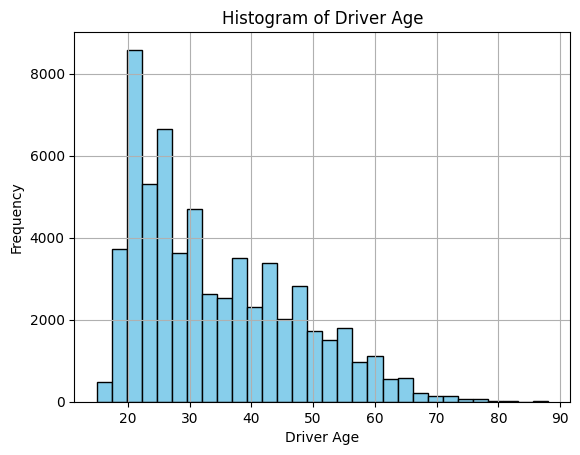

In [ ]:

pol['driver_age'].dropna().plot.hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Driver Age')
plt.xlabel('Driver Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatter Plot of driver_age_raw vs driver_age 😎

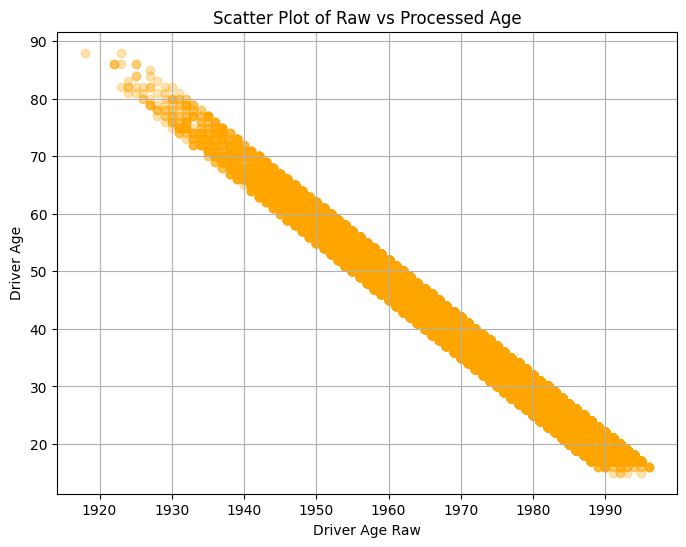

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pol['driver_age_raw'], pol['driver_age'], alpha=0.3, color='orange')
plt.title('Scatter Plot of Raw vs Processed Age')
plt.xlabel('Driver Age Raw')
plt.ylabel('Driver Age')
plt.grid(True)
plt.show()

## Pie Chart of driver_gender👀

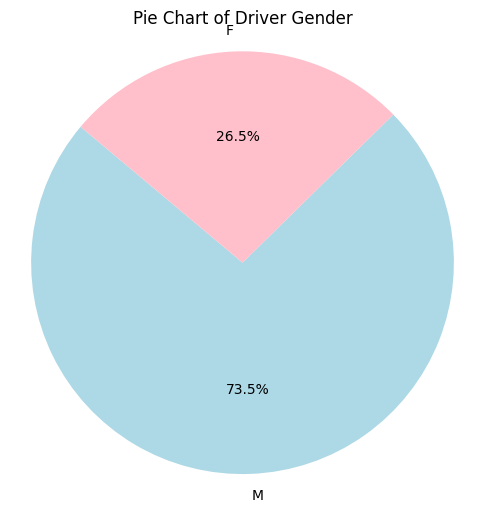

In [ ]:
gender_counts = pol['driver_gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink'])
plt.title('Pie Chart of Driver Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


## Line Plot of Number of Stops Over Time🤣

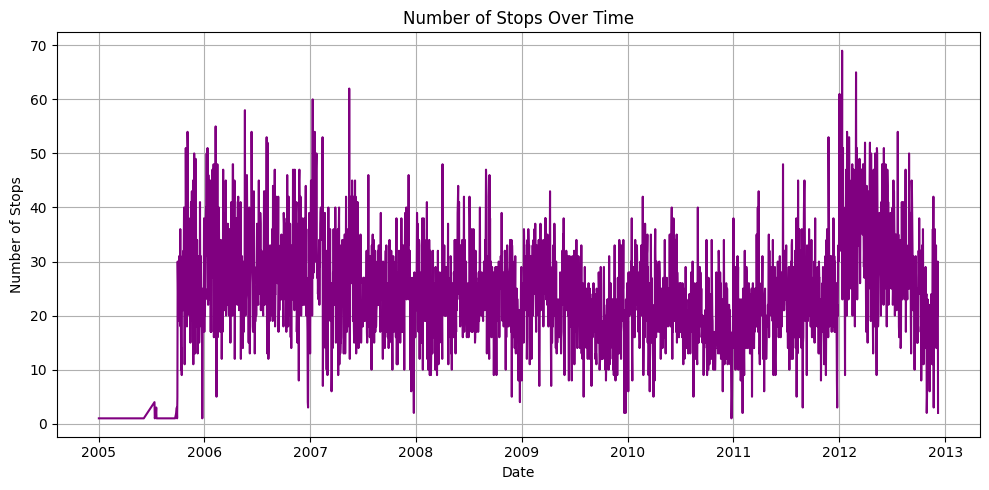

In [ ]:
pol['stop_date'] = pd.to_datetime(pol['stop_date'], errors='coerce')
stops_per_day = pol['stop_date'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(stops_per_day.index, stops_per_day.values, color='purple')
plt.title('Number of Stops Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Stops')
plt.grid(True)
plt.tight_layout()
plt.show()


## Subplot with All Plots Together❎

In [1]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axs[0, 0].hist(pol['driver_age'].dropna(), bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title("Histogram of Driver Age")
axs[0, 0].set_xlabel("Age")
axs[0, 0].set_ylabel("Frequency")

# Scatter Plot
axs[0, 1].scatter(pol['driver_age_raw'], pol['driver_age'], alpha=0.3, color='orange')
axs[0, 1].set_title("Raw vs Processed Age")
axs[0, 1].set_xlabel("Raw Age")
axs[0, 1].set_ylabel("Processed Age")

# Pie Chart
gender_counts = pol['driver_gender'].value_counts()
axs[1, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink'])
axs[1, 0].set_title("Driver Gender Distribution")

# Line Plot
stops_per_day = pol['stop_date'].value_counts().sort_index()
axs[1, 1].plot(stops_per_day.index, stops_per_day.values, color='purple')
axs[1, 1].set_title("Stops Over Time")
axs[1, 1].set_xlabel("Date")
axs[1, 1].set_ylabel("Number of Stops")

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined